In [8]:
""" Functions for generating 2D grid maps, for AI Lab 2 - path planning.
"""

import random
import numpy as np
import matplotlib.pyplot as plt

percentOfObstacle = 0.9  # 30% - 60%, random

def generateMap2d(size_):

    '''Generates a random 2d map with obstacles (small blocks) randomly distributed. 
       You can specify any size of this map but your solution has to be independent of map size

    Parameters:
    -----------
    size_ : list
        Width and height of the 2d grid map, e.g. [60, 60]. The height and width of the map shall be greater than 20.

    Returns:
    --------
        map2d : array-like, shape (size_[0], size_[1])
           A 2d grid map, cells with a value of 0: Free cell; 
                                                -1: Obstacle;
                                                -2: Start point;
                                                -3: Goal point;
    '''
    
    size_x, size_y = size_[0], size_[1]

    map2d = np.random.rand(size_y, size_x)
    perObstacles_ = percentOfObstacle
    map2d[map2d <= perObstacles_] = 0
    map2d[map2d > perObstacles_] = -1

    yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]
    while (yloc[0] == yloc[1]) and (xloc[0] == xloc[1]):
        yloc, xloc = [np.random.random_integers(0, size_x-1,2), np.random.random_integers(0, size_y-1, 2)]

    map2d[xloc[0]][yloc[0]] = -2
    map2d[xloc[1]][yloc[1]] = -3
    
    print('start',map2d[xloc[0]][yloc[0]], 'Goal', map2d[xloc[1]][yloc[1]]  )
    print('start',xloc[0], yloc[0], 'Goal', xloc[1], yloc[1])
    

    return map2d

In [9]:
# Generate 2d grid map with rotated-H-shape object
def generateMap2d_obstacle(size_):
    '''Generates a random 2d map with a rotated-H-shape object in the middle and obstacles (small blocks) randomly distributed. 
       You can specify any size of this map but your solution has to be independent of map size

    Parameters:
    -----------
    size_ : list
        Width and height of the 2d grid map, e.g. [60, 60]. The height and width of the map shall be greater than 40.

    Returns:
    --------
        map2d : array-like, shape (size_[0], size_[1])
           A 2d grid map, cells with a value of 0: Free cell; 
                                               -1: Obstacle;
                                               -2: Start point;
                                               -3: Goal point;
                                            
       [ytop, ybot, minx] : list
           information of the rotated-H-shape object
           ytop - y coordinate of the top horizontal wall/part
           ybot - y coordinate of the bottom horizontal wall/part
           minx - X coordinate of the vertical wall 
    '''
    
    size_x, size_y = size_[0], size_[1]
    map2d = generateMap2d(size_)

    map2d[map2d==-2] = 0
    map2d[map2d==-3] = 0

    # add special obstacle
    xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
    ytop = np.random.random_integers(7*size_y//10 + 3, size_y - 5)
    xbot = np.random.random_integers(3, 3*size_x//10-5), np.random.random_integers(7*size_x//10+3, size_x-5)
    ybot = np.random.random_integers(5, size_y//5 - 3)


    map2d[ybot, xbot[0]:xbot[1]+1] = -1
    map2d[ytop, xtop[0]:xtop[1]+1] = -1
    minx = (xbot[0]+xbot[1])//2
    maxx = (xtop[0]+xtop[1])//2
    if minx > maxx:
        tempx = minx
        minx = maxx
        maxx = tempx
    if maxx == minx:
        maxx = maxx+1

    map2d[ybot:ytop, minx:maxx] = -1
    startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]

    map2d[startp[1], startp[0]] = -2
    goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]

    map2d[goalp[1],goalp[0]] = -3
    #return map2d, [startp[1], startp[0]], [goalp[1], goalp[0]], [ytop, ybot]
    return map2d, [ytop, ybot, minx]

In [10]:
# helper function for plotting the result
def plotMap(map2d_, path_=None, title_ =''):
    
    '''Plots a map (image) of a 2d matrix with a path from start point to the goal point. 
        cells with a value of 0: Free cell; 
                             -1: Obstacle;
                             -2: Start point;
                             -3: Goal point;
    Parameters:
    -----------
    map2d_ : array-like
        an array with Real Numbers
        
    path_ : array-like
        an array of 2d corrdinates (of the path) in the format of [[x0, y0], [x1, y1], [x2, y2], ..., [x_end, y_end]]
        
    title_ : string
        information/description of the plot

    Returns:
    --------

    '''
    
    import matplotlib.cm as cm
    plt.interactive(False)
    
    colors_nn = int(map2d_.max())
    colors = cm.winter(np.linspace(0, 1, colors_nn))

    colorsMap2d = [[[] for x in range(map2d_.shape[1])] for y in range(map2d_.shape[0])]
    # Assign RGB Val for starting point and ending point
    locStart, locEnd = np.where(map2d_ == -2), np.where(map2d_ == -3)
    
    
    colorsMap2d[locStart[0][0]][locStart[1][0]] = [.0, .0, .0, 1.0]  # black
    colorsMap2d[locEnd[0][0]][locEnd[1][0]] = [0.8, 0.4, 0.1, 0.5]  # white

    # Assign RGB Val for obstacle
    locObstacle = np.where(map2d_ == -1)
    for iposObstacle in range(len(locObstacle[0])):
        colorsMap2d[locObstacle[0][iposObstacle]][locObstacle[1][iposObstacle]] = [1.0, .0, .0, 1.0]
    # Assign 0
    locZero = np.where(map2d_ == 0)

    for iposZero in range(len(locZero[0])):
        colorsMap2d[locZero[0][iposZero]][locZero[1][iposZero]] = [1.0, 1.0, 1.0, 1.0]

    # Assign Expanded nodes
    locExpand = np.where(map2d_>0)

    for iposExpand in range(len(locExpand[0])):
        _idx_ = int(map2d_[locExpand[0][iposExpand]][locExpand[1][iposExpand]]-1)
        colorsMap2d[locExpand[0][iposExpand]][locExpand[1][iposExpand]] = colors[_idx_]

    for irow in range(len(colorsMap2d)):
        for icol in range(len(colorsMap2d[irow])):
            if colorsMap2d[irow][icol] == []:
                colorsMap2d[irow][icol] = [1.0, 0.0, 0.0, 1.0]
                
    if  path_ is not None: path = path_.T.tolist()
    
    plt.figure()
    plt.title(title_)
    plt.imshow(colorsMap2d, interpolation='nearest')
    plt.colorbar()
    if  path_ is not None:plt.plot(path[:][0],path[:][1], color='magenta',linewidth=2.5)
    plt.show()



In [58]:
x = np.random.randint(5, size=2)
x1, y1 = x
y = [x1, y1]
y

[0, 4]

In [71]:
import warnings
warnings.filterwarnings('ignore')

def randomSearch(mapToSearch):
    searchMap = np.copy(mapToSearch)

    for mapRow in range(len(mapToSearch)):
        for mapColumn in range(len(mapToSearch)):
            # print the map's rows and columns 
            print(mapToSearch[mapRow][mapColumn], end='\t')
            if mapToSearch[mapRow][mapColumn]==-2:
                xStart, yStart = mapRow, mapColumn
                
            if mapToSearch[mapRow][mapColumn]==-3:
                xGoal, yGoal = mapRow, mapColumn

    startPos=[xStart, yStart]
    goalPos=[xGoal, yGoal]

    # cost moving to another cell
    movingCost=0
    
    # set to store visited cells
    pathVisited=[]
    pathVisited.append([startPos])
    
    # To check if path found or not 
    pathFound=False

    # path taken
    fromPath=[]
    fromPath.append(startPos)

    while (not pathFound and len(pathVisited)!=len(mapToSearch)**2):
        row, column = np.random.randint(len(mapToSearch), size=2)
        current=[row, column]
        if current in pathVisited:
            continue
        pathVisited.append([row,column])
        if mapToSearch[row][column]==-1:
            continue
            
        fromPath.append(current)
        
        if current == goalPos:
            pathFound=True
            break
        
        # compute cost to reach next cell
        movingCost+=1
        if searchMap[row][column]!=-3 and mapToSearch[row][column]!=-1 and mapToSearch[row][column]!=-2:
            searchMap[row][column]=movingCost
        
        # add to path
        fromPath.append(current)

    if pathFound==False: 
        print(f"No path towards goal, total path visited: {pathVisited}, total Map Length: {len(mapToSearch)}")
        return -1
    else:
        fromPath2 = []
        for path in fromPath:
            row1, column1=path
            row1, column1=column1,row1
            fromPath2.append([row1,column1])
            
        fromPath=np.array(fromPath2)

        plotMap(mapToSearch)
        plotMap(searchMap, fromPath, 'path')
        return movingCost, len(fromPath)

start -2.0 Goal -3.0
start 32 31 Goal 49 45


0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	

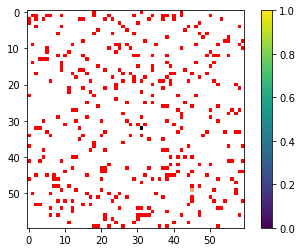

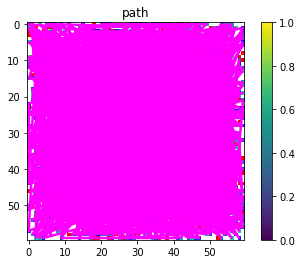

(1522, 3046)

In [72]:
mapToSearch = generateMap2d([60, 60])
randomSearch(mapToSearch)

start -2.0 Goal -3.0
start 10 2 Goal 23 32
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1

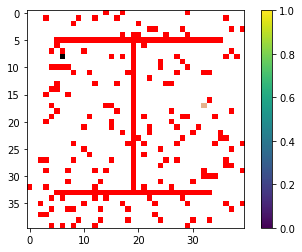

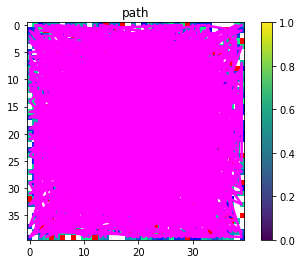

(1030, 2062)

In [68]:
mapToSearch2, info=generateMap2d_obstacle([40, 40])
randomSearch(mapToSearch2)

start -2.0 Goal -3.0
start 6 34 Goal 55 7

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0

0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	
0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	

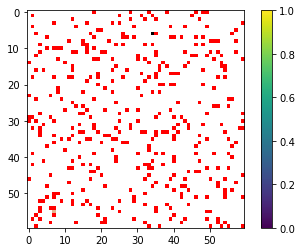

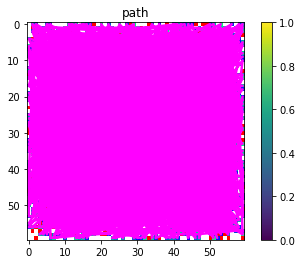

start -2.0 Goal -3.0
start 0 21 Goal 20 53

0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-2.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	
0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	0.0	
0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0

0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	
-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	
-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0

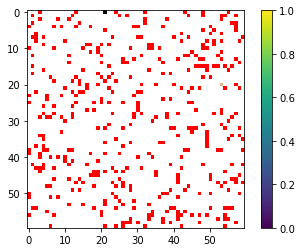

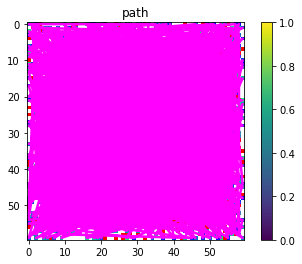

start -2.0 Goal -3.0
start 22 30 Goal 46 44

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0

0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-3.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	

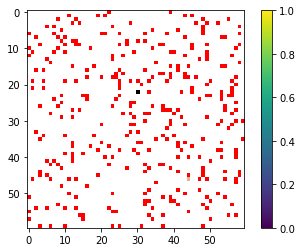

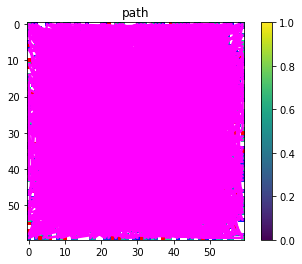

start -2.0 Goal -3.0
start 3 43 Goal 55 17

0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	
-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-2.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	

0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	
-1.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	
0.0	0.

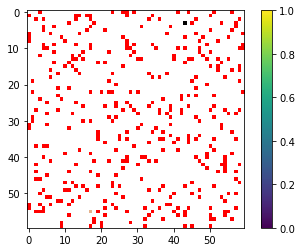

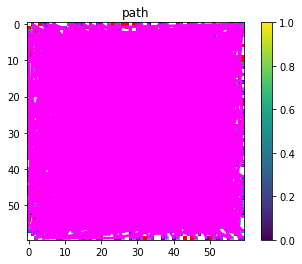

start -2.0 Goal -3.0
start 14 3 Goal 51 57

0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	
0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	
0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-3.0	-1.0	0.0	
0.0	

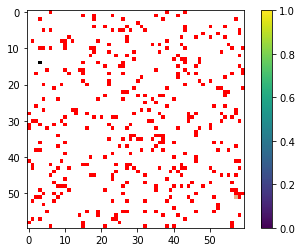

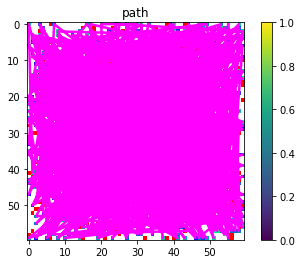

start -2.0 Goal -3.0
start 54 23 Goal 16 56

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	
-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	
0.0	0.0	-1.0	0.

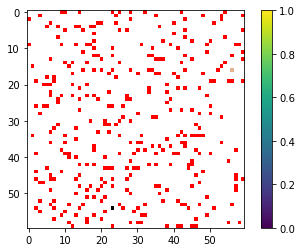

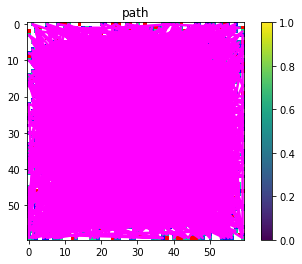

start -2.0 Goal -3.0
start 54 53 Goal 31 26

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	
-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.

0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	-

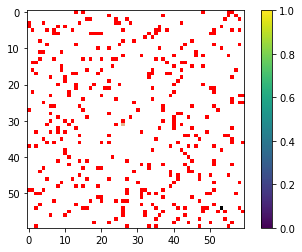

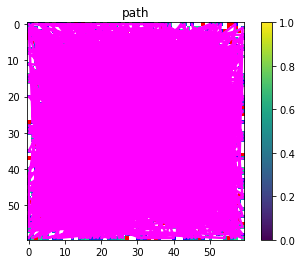

start -2.0 Goal -3.0
start 24 1 Goal 34 34

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	
-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	

0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.

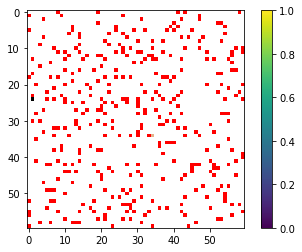

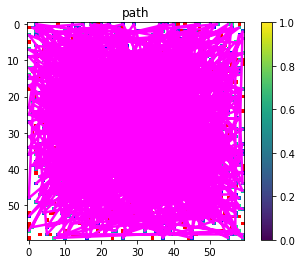

start -2.0 Goal -3.0
start 28 54 Goal 0 22

0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-3.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	
0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0

0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.

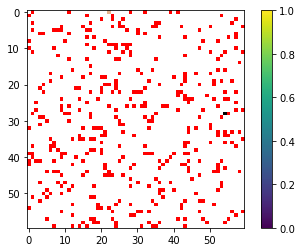

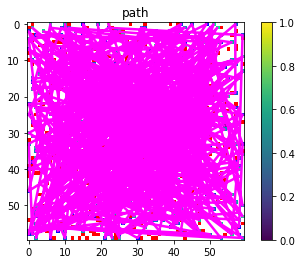

start -2.0 Goal -3.0
start 32 59 Goal 23 34

0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	
0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	0.0	

0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	
0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	
0.0	0.0	0.0	0.0	0

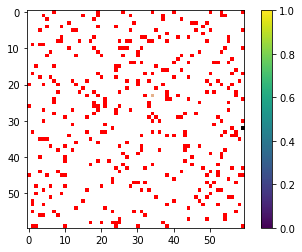

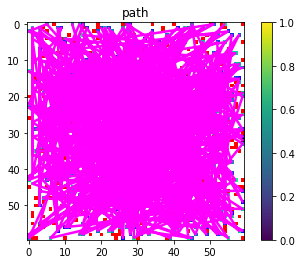

start -2.0 Goal -3.0
start 46 44 Goal 54 6

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	-1.

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	-1.0	0.0	0.0	0

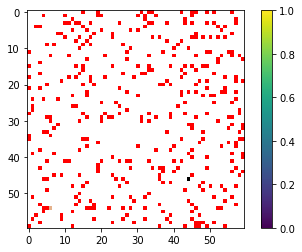

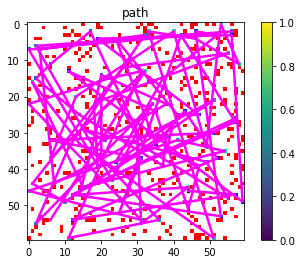

start -2.0 Goal -3.0
start 2 49 Goal 4 9

-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-2.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	
0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.

0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	-1.0	0.0	-1.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	
0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
-1.0	0.0	

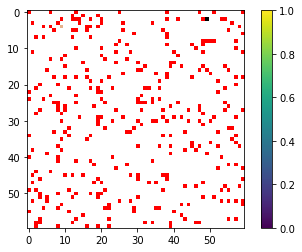

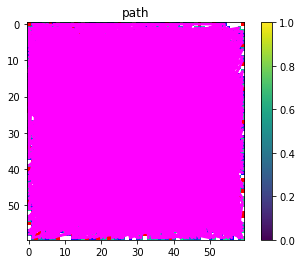

start -2.0 Goal -3.0
start 35 38 Goal 50 8

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	
0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	-1.0	
0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-3.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0

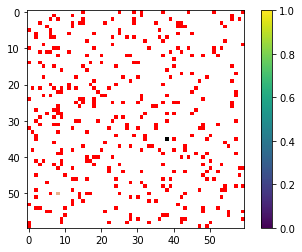

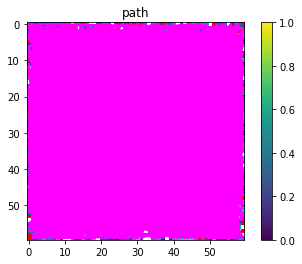

start -2.0 Goal -3.0
start 7 17 Goal 38 50

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	

0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	
-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	
0.0	0.0	0.0

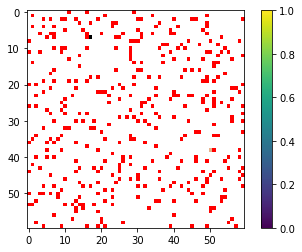

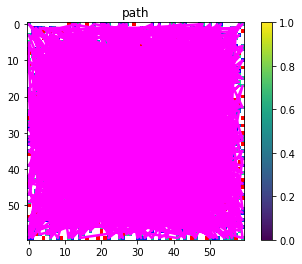

start -2.0 Goal -3.0
start 14 26 Goal 47 47

0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	
0.0	0.0	0.

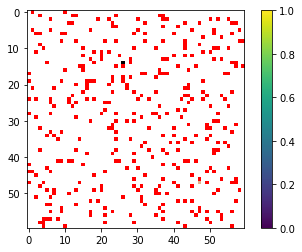

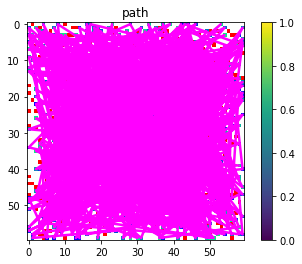

start -2.0 Goal -3.0
start 27 26 Goal 42 19

-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	
0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.

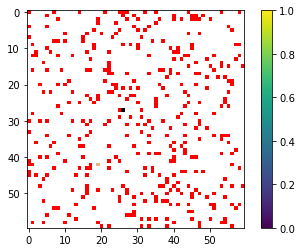

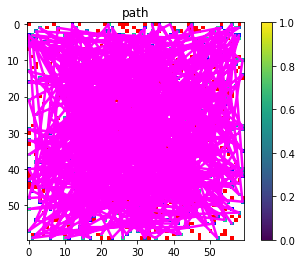

start -2.0 Goal -3.0
start 29 24 Goal 31 50

0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	
-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.

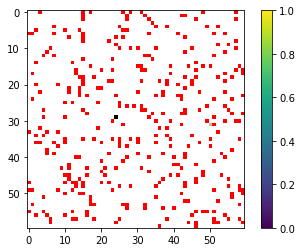

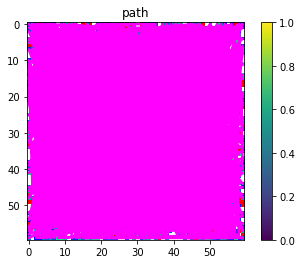

start -2.0 Goal -3.0
start 33 32 Goal 30 52

0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	
0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	

0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	
-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	-1.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	
0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	
0.0	0.0

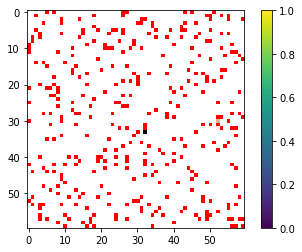

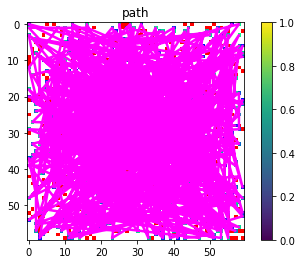

start -2.0 Goal -3.0
start 7 16 Goal 46 59

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	
-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.

0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0

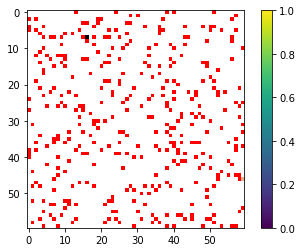

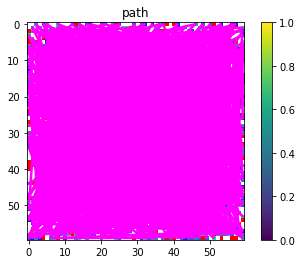

start -2.0 Goal -3.0
start 22 55 Goal 48 56

0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-3.0	-1.0	0.0	0.0	
0

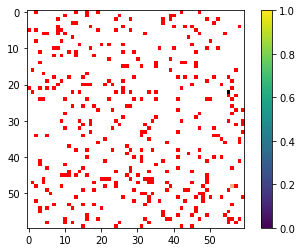

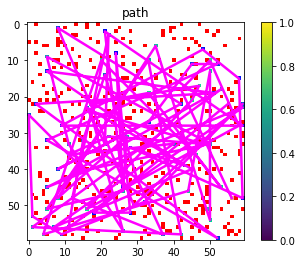

Total Nodes Expandes Per Iteration: [1921, 1596, 1941, 1771, 1089, 1773, 1681, 932, 510, 588, 92, 2476, 2804, 1418, 854, 522, 2415, 631, 1620, 78]
Total Path Taken Per Iteration: [3844, 3194, 3884, 3544, 2180, 3548, 3364, 1866, 1022, 1178, 186, 4954, 5610, 2838, 1710, 1046, 4832, 1264, 3242, 158]
Time Taken Per Iteration: [1.7485368251800537, 1.5231401920318604, 1.737544059753418, 1.652043104171753, 1.3561253547668457, 1.6828513145446777, 1.5272433757781982, 1.5102992057800293, 1.2258992195129395, 1.2616124153137207, 1.3654499053955078, 2.032815933227539, 2.4512691497802734, 1.5034306049346924, 1.3757460117340088, 1.357539176940918, 1.9469280242919922, 1.3294732570648193, 1.5379323959350586, 1.180694818496704]
Mean of Nodes: 1335.6
Mean of Path: 2673.2
Mean of Time Taken: 1.5653287172317505
Standard Deviation of Nodes: 773.607161290535
Standard Deviation of Nodes: 1547.21432258107
Standard Deviation of Nodes: 0.30152199733404517


In [73]:
import time
import numpy

NodesExpanded = []
pathLength=[]
timeTakenPerIter = []

for i in range(20):
    map1 = generateMap2d([60, 60])
    start=time.time()
    expandCenter, randomPath=random_search(map1)
    stop=time.time()
    NodesExpanded.append(expandCenter)
    pathLength.append(randomPath)
    timed=stop-start
    timeTakenPerIter.append(timed)
    
    
print(f"Total Nodes Expandes Per Iteration: {NodesExpanded}") 
print(f"Total Path Taken Per Iteration: {pathLength}")
print(f"Time Taken Per Iteration: {timeTakenPerIter}")

print(f"Mean of Nodes: {numpy.mean(NodesExpanded)}")
print(f"Mean of Path: {numpy.mean(pathLength)}")
print(f"Mean of Time Taken: {numpy.mean(timeTakenPerIter)}")


print(f"Standard Deviation of Nodes: {numpy.std(NodesExpanded)}")
print(f"Standard Deviation of Nodes: {numpy.std(pathLength)}")
print(f"Standard Deviation of Nodes: {numpy.std(timeTakenPerIter)}")

start -2.0 Goal -3.0
start 29 40 Goal 47 25

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	
0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.

0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.

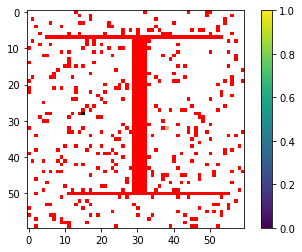

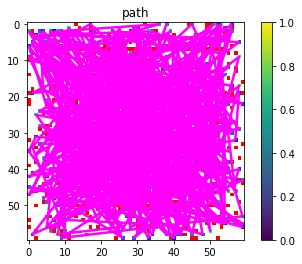

start -2.0 Goal -3.0
start 23 52 Goal 51 25

0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	
0.0	0.0	0.0	0

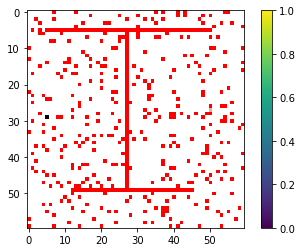

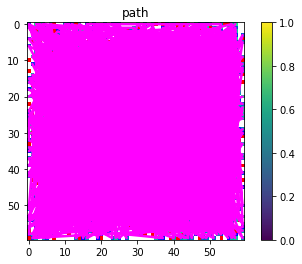

start -2.0 Goal -3.0
start 57 22 Goal 46 18

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	

0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	
0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	
0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	

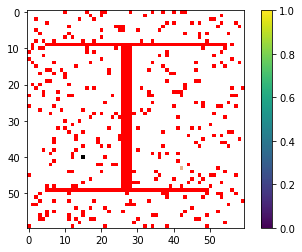

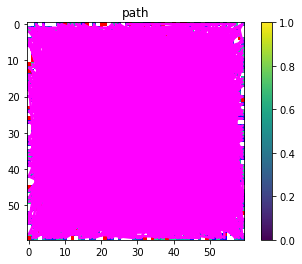

start -2.0 Goal -3.0
start 27 47 Goal 54 3

0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	
-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	
0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	
0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0

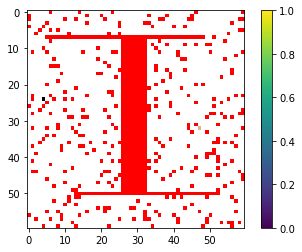

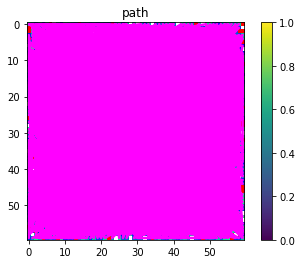

start -2.0 Goal -3.0
start 29 23 Goal 43 55

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	

0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	
0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	-1.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	
-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.

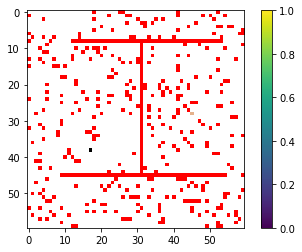

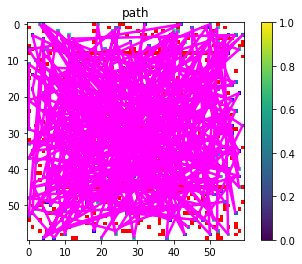

start -2.0 Goal -3.0
start 18 40 Goal 34 31

0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	
0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	
0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	

0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	
0.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	
0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.

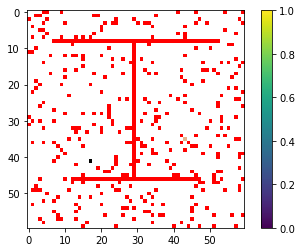

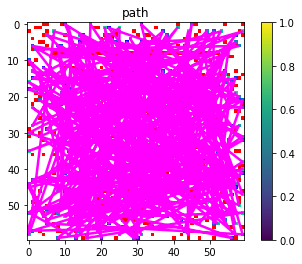

start -2.0 Goal -3.0
start 30 43 Goal 41 8

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	
-1.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0

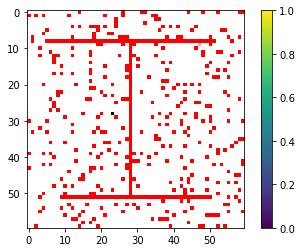

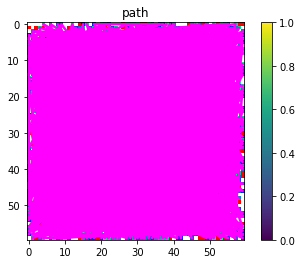

start -2.0 Goal -3.0
start 53 9 Goal 37 5

-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.

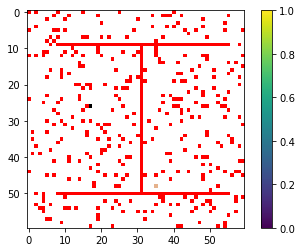

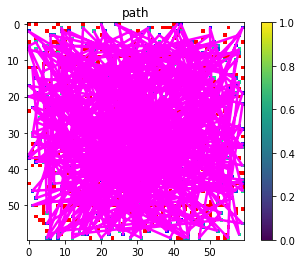

start -2.0 Goal -3.0
start 35 17 Goal 3 41

0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	
0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	
-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	

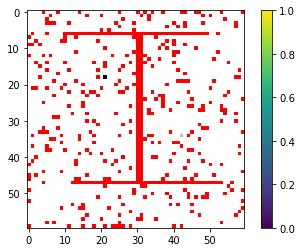

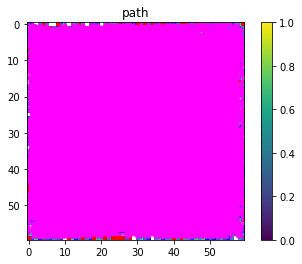

start -2.0 Goal -3.0
start 10 51 Goal 7 38

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	
0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0

-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	
0.0	0.0	-1.0	0.0	0

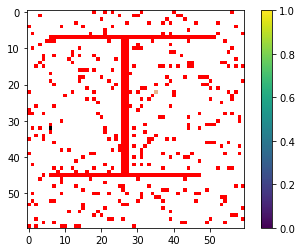

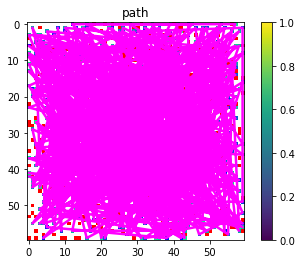

start -2.0 Goal -3.0
start 13 43 Goal 9 9

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0

0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	
-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	0.

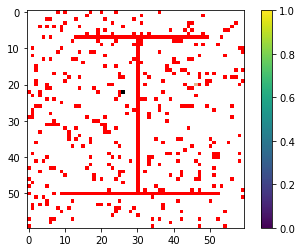

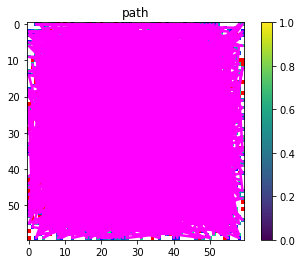

start -2.0 Goal -3.0
start 48 32 Goal 9 51

0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	0.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	
0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	

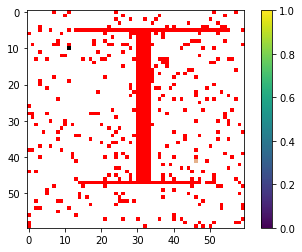

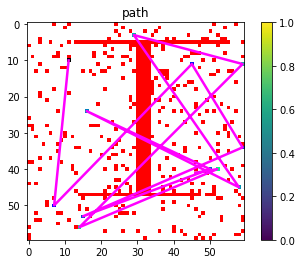

start -2.0 Goal -3.0
start 46 54 Goal 4 15

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	
0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0

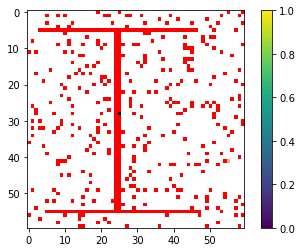

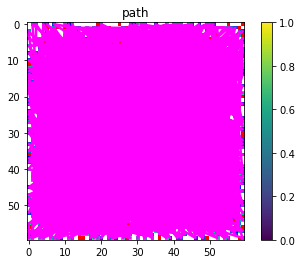

start -2.0 Goal -3.0
start 36 32 Goal 28 20

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	
0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	

-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	
0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	

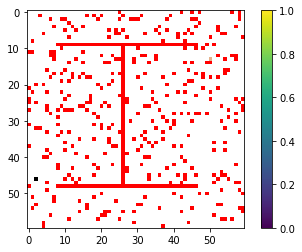

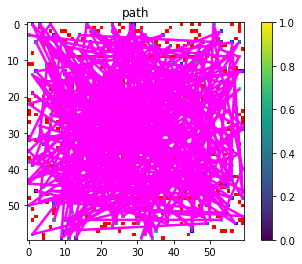

start -2.0 Goal -3.0
start 48 3 Goal 27 41

0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.

0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	-1.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	0.0	-1.0	0.0	0.0	-1.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0

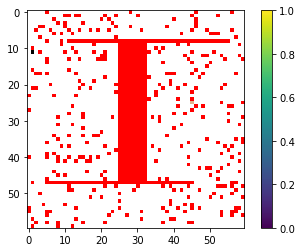

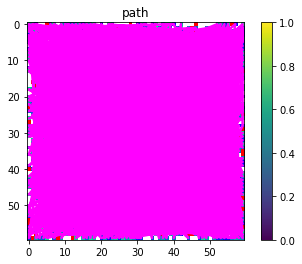

start -2.0 Goal -3.0
start 49 12 Goal 15 39

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0

0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	
0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	
0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	0.0	0.

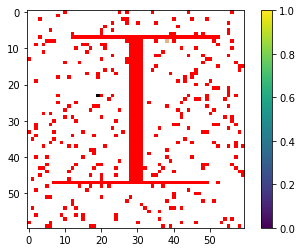

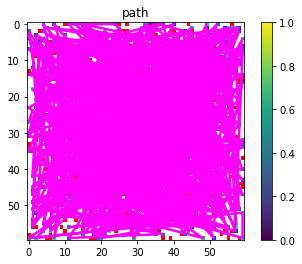

start -2.0 Goal -3.0
start 20 49 Goal 24 48

-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0

0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	0.0	
0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	
0.0	-1.

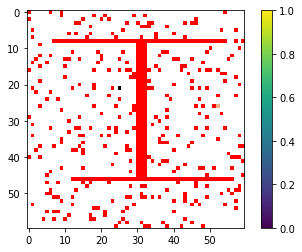

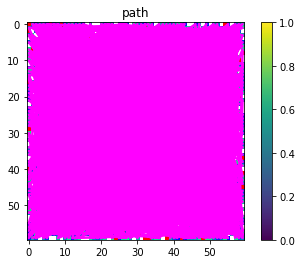

start -2.0 Goal -3.0
start 12 18 Goal 1 39

0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	

0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.

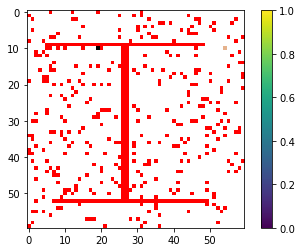

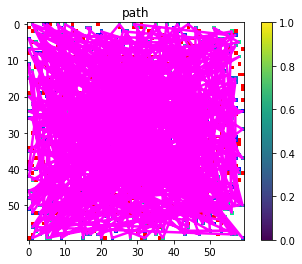

start -2.0 Goal -3.0
start 56 31 Goal 9 36

0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	-1.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	
0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	
0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0

0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1.0	-1

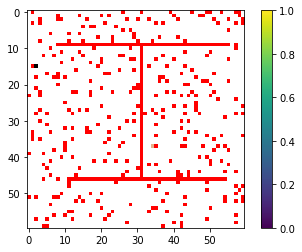

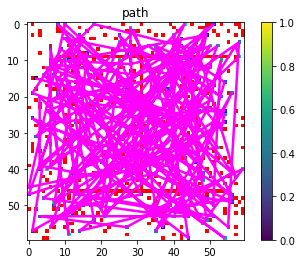

start -2.0 Goal -3.0
start 50 42 Goal 0 10

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	
0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	-1.0	-1.0	0.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	-1.0	-1.0	-1.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	-1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0

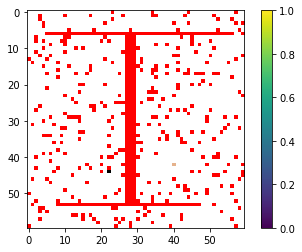

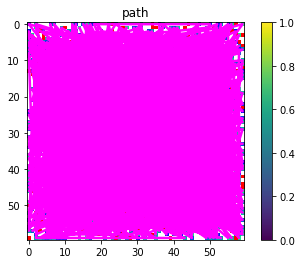

Total Nodes Expandes Per Iteration: [466, 1725, 2139, 2707, 308, 363, 2235, 451, 2833, 628, 1469, 11, 1779, 345, 2178, 688, 2388, 595, 178, 1439]
Total Path Taken Per Iteration: [934, 3452, 4280, 5416, 618, 728, 4472, 904, 5668, 1258, 2940, 24, 3560, 692, 4358, 1378, 4778, 1192, 358, 2880]
Time Taken Per Iteration: [1.1772360801696777, 1.503347396850586, 1.8470919132232666, 2.8827595710754395, 1.3215956687927246, 1.2132389545440674, 2.0173733234405518, 1.2841925621032715, 2.7384469509124756, 1.3506641387939453, 1.5108082294464111, 1.246528148651123, 1.6317296028137207, 1.2385058403015137, 1.9831085205078125, 1.3206138610839844, 2.061810255050659, 1.2955567836761475, 1.240156650543213, 1.6331727504730225]
Mean of Nodes: 1246.25
Mean of Path: 2494.5
Mean of Time Taken: 1.6248968601226808
Standard Deviation of Nodes: 913.6917354885071
Standard Deviation of Nodes: 1827.3834709770142
Standard Deviation of Nodes: 0.48308443232880044


In [70]:
import time
import numpy

expandedObstacles = []
pathObstacles = []
timeObstacles=[]

for i in range(20):
    mapToSearch3, info=generateMap2d_obstacle([60, 60])
    start=time.time()
    expandedObstaclesNodes, path_rand=random_search(mapToSearch3)
    stop=time.time()
    expandedObstacles.append(expandedObstaclesNodes)
    pathObstacles.append(path_rand)
    timed=stop-start
    timeObstacles.append(timed) 

    
print(f"Total Nodes Expandes Per Iteration: {expandedObstacles}") 
print(f"Total Path Taken Per Iteration: {pathObstacles}")
print(f"Time Taken Per Iteration: {timeObstacles}")

print(f"Mean of Nodes: {numpy.mean(expandedObstacles)}")
print(f"Mean of Path: {numpy.mean(pathObstacles)}")
print(f"Mean of Time Taken: {numpy.mean(timeObstacles)}")


print(f"Standard Deviation of Nodes: {numpy.std(expandedObstacles)}")
print(f"Standard Deviation of Nodes: {numpy.std(pathObstacles)}")
print(f"Standard Deviation of Nodes: {numpy.std(timeObstacles)}")
